Load numpy, matplotlib and pandas, read the CSV into df, and compute the percentage of missing values per column (df.isnull().mean()*100).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data_science_job.csv')
df.isnull().mean()*100


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  str    
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  str    
 4   relevent_experience     19158 non-null  str    
 5   enrolled_university     18772 non-null  str    
 6   education_level         18698 non-null  str    
 7   major_discipline        16345 non-null  str    
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  str    
 10  company_type            13018 non-null  str    
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), str(8)
memory usage: 1.9 MB


In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9807,0.926,no_enrollment,Graduate,20.0,70.0
13961,0.920,no_enrollment,Graduate,20.0,23.0
12137,0.926,Full time course,Graduate,5.0,100.0
3613,0.624,no_enrollment,Masters,5.0,69.0
4246,0.920,no_enrollment,Graduate,20.0,52.0


In [10]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [13]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

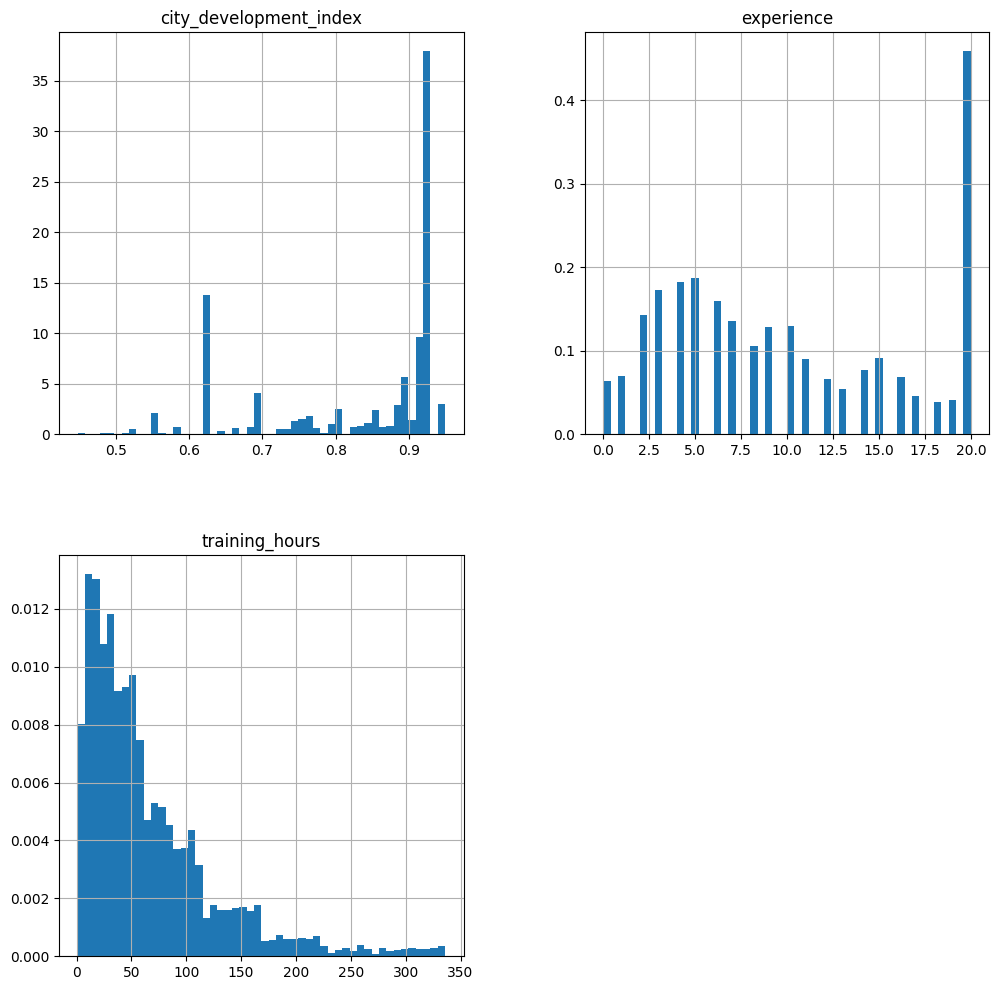

In [14]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

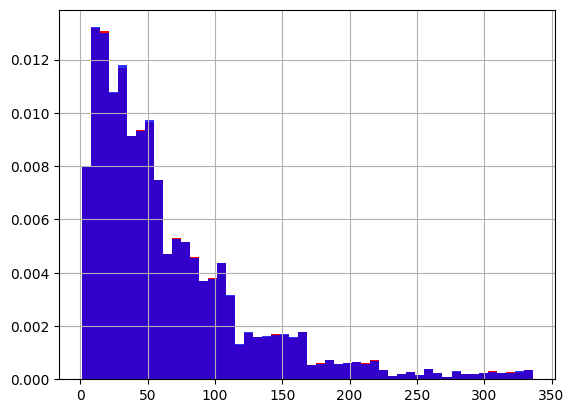

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['training_hours'].hist(bins=50, density=True, ax=ax, color='red')

#data after cca, the argument alpha makes the color transparent, so we can see
#both histograms
new_df['training_hours'].hist(bins=50, density=True, ax=ax, color='blue', alpha=0.8)

<Axes: ylabel='Density'>

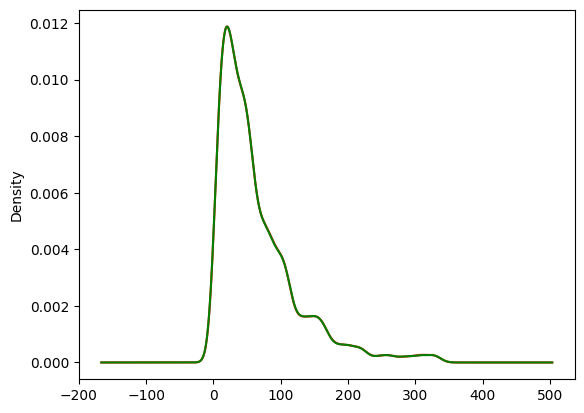

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['training_hours'].plot.density(color='red')

#data after cca
new_df['training_hours'].plot.density(color='green')